In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Enter raw data
scores = np.array([[0.921, 0.919, 0.928, 0.941, 0.810, 0.953],
             [0.912, 0.901, 0.915, 0.932, 0.752, 0.960], # mnist
             [0.741, 0.690, 0.701, 0.693, 0.605, 0.721],
             [0.712, 0.640, 0.701, 0.712, 0.577, 0.746], # fashion
             [0.360, 0.736, 0.679, 0.662, 0.636, 0.737],
             [0.278, 0.407, 0.378, 0.404, 0.443, 0.666], # cifar
             [0.843, 0.753, 0.806, 0.810, 0.778, 0.850],
             [0.758, 0.538, 0.696, 0.711, 0.561, 0.842], # dog vs catbreeds
             [0.273, 0.674, 0.650, 0.607, 0.630, 0.689],
             [0.154, 0.425, 0.406, 0.454, 0.369, 0.498], # dog breeds
             [0.864, 0.742, 0.853, 0.813, 0.820, 0.869],
             [0.836, 0.583, 0.718, 0.767, 0.615, 0.799], # gtsrb
             [0.789, 0.779, 0.809, 0.784, 0.804, 0.804],
             [0.730, 0.654, 0.657, 0.746, 0.601, 0.748], # icons
             [0.386, 0.356, 0.352, 0.330, 0.292, 0.374],
             [0.330, 0.204, 0.201, 0.223, 0.268, 0.396], # sketch
             [0.553, 0.860, 0.832, 0.846, 0.810, 0.866],
             [0.492, 0.636, 0.595, 0.680, 0.530, 0.754], # imagenete
             [0.087, 0.366, 0.350, 0.357, 0.340, 0.366], 
             [0.069, 0.188, 0.173, 0.194, 0.208, 0.258]] # tiny imagenet
             )



In [3]:
np.arange(1,10,2)

array([1, 3, 5, 7, 9])

In [4]:
fgsm = scores[np.arange(0,scores.shape[0],2), :]
pgd = scores[np.arange(1,scores.shape[0],2), :]

In [5]:
pgd

array([[0.912, 0.901, 0.915, 0.932, 0.752, 0.96 ],
       [0.712, 0.64 , 0.701, 0.712, 0.577, 0.746],
       [0.278, 0.407, 0.378, 0.404, 0.443, 0.666],
       [0.758, 0.538, 0.696, 0.711, 0.561, 0.842],
       [0.154, 0.425, 0.406, 0.454, 0.369, 0.498],
       [0.836, 0.583, 0.718, 0.767, 0.615, 0.799],
       [0.73 , 0.654, 0.657, 0.746, 0.601, 0.748],
       [0.33 , 0.204, 0.201, 0.223, 0.268, 0.396],
       [0.492, 0.636, 0.595, 0.68 , 0.53 , 0.754],
       [0.069, 0.188, 0.173, 0.194, 0.208, 0.258]])

In [6]:
fgsm_m = fgsm.mean(axis=0)
pgd_m = pgd.mean(axis=0)

In [7]:
fgsm_std = fgsm.std(axis=0)
pgd_std = pgd.std(axis=0)

In [8]:
# Create lists for the plot
labels = ['Edge', 'Img', 'Img +\n Edge', 'Img +\n Edge \n Redet.', 'Img + \n Redet. \n Edge', 'Img + \n Redet. \n Edge \n Redet.']
# x_pos = np.arange(len(materials))
# CTEs = [aluminum_mean, copper_mean, steel_mean]
# error = [aluminum_std, copper_std, steel_std]

In [9]:
# # Build the plot

# x_pos = np.arange(len(fgsm_m))

# fig, ax = plt.subplots()
# # ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
# # ax.bar(x_pos, fgsm_m,  align='center', alpha=0.5, ecolor='black', capsize=10)
# ax.bar(x_pos, pgd_m,  align='center', alpha=0.5, ecolor='black', capsize=10)

# ax.set_ylim([0,.78])
# ax.set_ylabel('Coefficient of Thermal Expansion ($\degree C^{-1}$)')
# ax.set_xticks(x_pos)
# ax.set_xticklabels(materials)
# ax.set_title('Coefficent of Thermal Expansion (CTE) of Three Metals')
# ax.yaxis.grid(True)

# # Save the figure and show
# plt.tight_layout()
# plt.savefig('bar_plot_with_error_bars.png')
# plt.show()

In [10]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.3f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
        
# def autolabel_plot(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
#     for rect in rects:
#         height = rect.()
#         ax.annotate('{0:.3f}'.format(height),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')
        


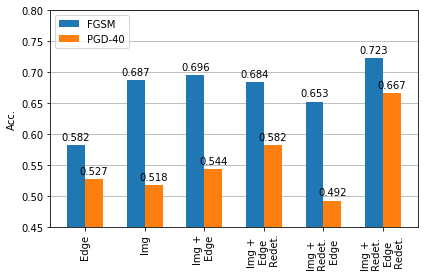

In [12]:
x = np.arange(len(fgsm_m))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, fgsm_m, width, label='FGSM')
rects2 = ax.bar(x + width/2, pgd_m, width, label='PGD-40')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_axisbelow(True)
ax.grid(axis='y')
ax.set_ylabel('Acc.')
# ax.set_title('Avg. classifier accuracy over 10 datasets')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation='vertical')

ax.legend(loc='upper left')
ax.set_ylim([0.45,.8])



autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [163]:
x_pos

array([0, 1, 2, 3, 4, 5])

In [1]:
# Results over regular training!

In [116]:
res1 = np.array([[[0.964 , 0.925 , 0.586 , 0.059],
[0.973 , 0.947 , 0.717 , 0.162],
[0.972 , 0.941 , 0.664 , 0.089],
[0.972 , 0.950 , 0.803 , 0.356]],


[[0.964 , 0.923 , 0.345 , 0.000],
[0.973 , 0.944 , 0.537 , 0.008],
[0.972 , 0.938 , 0.446 , 0.001],
[0.972 , 0.950 , 0.741 , 0.116]],


[[0.775 , 0.714 , 0.497 , 0.089],
[0.798 , 0.670 , 0.288 , 0.027],
[0.809 , 0.662 , 0.229 , 0.010],
[0.809 , 0.691 , 0.326 , 0.053]],


[[0.775 , 0.711 , 0.370 , 0.002],
[0.798 , 0.659 , 0.133 , 0.000],
[0.809 , 0.647 , 0.100 , 0.000],
[0.809 , 0.682 , 0.235 , 0.014]]])


res2 = np.array([[[0.964 , 0.925 , 0.586 ],
[0.973 , 0.947 , 0.717 ],
[0.972 , 0.941 , 0.664 ],
[0.972 , 0.950 , 0.803 ]],


[[0.964 , 0.923 , 0.345],
[0.973 , 0.944 , 0.537],
[0.972 , 0.938 , 0.446],
[0.972 , 0.950 , 0.741]],


[[0.775 , 0.714 , 0.497 ],
[0.798 , 0.670 , 0.288 ],
[0.809 , 0.662 , 0.229 ],
[0.809 , 0.691 , 0.326 ]],


[[0.775 , 0.711 , 0.370],
[0.798 , 0.659 , 0.133 ],
[0.809 , 0.647 , 0.100 ],
[0.809 , 0.682 , 0.235 ]],    
    
    
[[0.490 , 0.060 , 0.015],
[0.887 , 0.359 , 0.246],
[0.860 , 0.366 , 0.169],
[0.860 , 0.399 , 0.281]],

[[0.490 , 0.071 , 0.000],
[0.887 , 0.018 , 0.000],
[0.860 , 0.019 , 0.000],
[0.860 , 0.306 , 0.093]],


[[0.136 , 0.010 , 0.001],
[0.531 , 0.166 , 0.074],
[0.522 , 0.152 , 0.050],
[0.522 , 0.171 , 0.081]],

[[0.136 , 0.007 , 0.000],
[0.531 , 0.019 , 0.000],
[0.522 , 0.008 , 0.000],
[0.522 , 0.074 , 0.009]],



[[0.814 , 0.633 , 0.119],
[0.863 , 0.007 , 0.051],
[0.823 , 0.007 , 0.000],
[0.823 , 0.043 , 0.002]],



[[0.814 , 0.624 , 0.018],
[0.863 , 0.000 , 0.000],
[0.823 , 0.000 , 0.000],
[0.823 , 0.006 , 0.000]],



[[0.750 , 0.006 , 0.031],
[0.865 , 0.256 , 0.140],
[0.888 , 0.225 , 0.098],
[0.888 , 0.244 , 0.171]],





[[0.607 , 0.000 , 0.000],
[0.899 , 0.000 , 0.000],
[0.896 , 0.000 , 0.000],
[0.896 , 0.008 , 0.000]],







[[0.938 , 0.683 , 0.315],
[0.955 , 0.464 , 0.322],
[0.951 , 0.624 , 0.382],
[0.951 , 0.592 , 0.471]],



[[0.938 , 0.618 , 0.054],
[0.955 , 0.189 , 0.033],
[0.951 , 0.271 , 0.021],
[0.951 , 0.526 , 0.251]],


[[0.883 , 0.545 , 0.210],
[0.930 , 0.495 , 0.433],
[0.929 , 0.569 , 0.433],
[0.929 , 0.470 , 0.414]],



[[0.883 , 0.423 , 0.000],
[0.930 , 0.341 , 0.113],
[0.929 , 0.320 , 0.011],
[0.929 , 0.416 , 0.248]],


[[0.479 , 0.167 , 0.041],
[0.532 , 0.109 , 0.021],
[0.486 , 0.097 , 0.019],
[0.486 , 0.263 , 0.004]],


[[0.480 , 0.106 , 0.000],
[0.532 , 0.028 , 0.000],
[0.486 , 0.034 , 0.000],
[0.486 , 0.277 , 0.024]],


[[0.780 , 0.101 , 0.436],
[0.969 , 0.617 , 0.409],
[0.959 , 0.613 , 0.373],
[0.959 , 0.652 , 0.471]],



[[0.780 , 0.064 , 0.000],
[0.969 , 0.052 , 0.005],
[0.959 , 0.045 , 0.000],
[0.959 , 0.445 , 0.069]]])



In [117]:
res1.shape

(4, 4, 4)

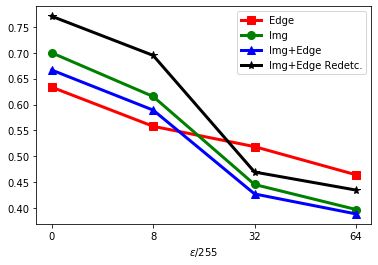

In [172]:
symbs = ['-rs','-go', '-b^', '-k*']
zz = np.mean(res1,axis=2).T
for i in np.arange(4):
    plt.plot(zz[i],symbs[i], linewidth=3, markersize=8)
plt.legend(['Edge', 'Img', 'Img+Edge', 'Img+Edge Redetc.'])
plt.xticks(np.arange(4), ['0', '8', '32', '64'])
plt.xlabel('$\epsilon / 255 $')
plt.show()

In [119]:
np.mean(res1,axis=2)

array([[0.6335 , 0.69975, 0.6665 , 0.77025],
       [0.558  , 0.6155 , 0.58925, 0.69475],
       [0.51875, 0.44575, 0.4275 , 0.46975],
       [0.4645 , 0.3975 , 0.389  , 0.435  ]])

In [102]:
res2.shape

(20, 4, 3)

In [89]:
fgsm = res2[:2,:,:]

In [90]:
fgsm.shape

(2, 4, 3)

In [49]:
# xx = np.mean(res2,axis=1)


In [103]:
fgsm_all = res2[::2]

In [104]:
pgd_all = res2[1::2]

In [110]:
# fgsm_all.shape

In [111]:
np.mean(fgsm_all,axis=0)

array([[0.7009, 0.3844, 0.2251],
       [0.8303, 0.409 , 0.2701],
       [0.8199, 0.4256, 0.2417],
       [0.8199, 0.4475, 0.3024]])

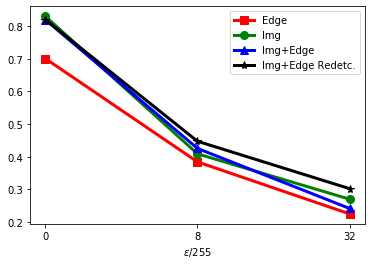

In [173]:
aa = np.mean(fgsm_all,axis=0)
symbs = ['-rs','-go', '-b^', '-k*']
for i in np.arange(4):
    plt.plot(aa[i],symbs[i], linewidth=3, markersize=8)
    plt.xticks(np.arange(3), ['0', '8', '32'])
#     plt.set_xticklabels(['0', '8', '32'])

# plt.set_xticks(list(np.arange(4)))    
plt.legend(['Edge', 'Img', 'Img+Edge', 'Img+Edge Redetc.'])
plt.xlabel('$\epsilon / 255 $')
plt.show()

# GAB based shape defence

In [175]:
# MNIST

In [6]:
# res = np.array([[[0.962200, 0.960900, 0.954300, 0.916900, 0.844400, 0.639500, .564700 , 0.132700]  , # MNIST
#        [0.962200, 0.960900, 0.954200, 0.913100, 0.790200, 0.479900 , 0.439100, 0.005400]],  
#        [[0.771200, 0.780700, 0.739200, 0.636400, 0.468300, 0.308700, 0.236600, 0.053200],#Fashion MNIST
#         [0.771200, 0.780700, 0.739100, 0.623100,  0.490300, 0.164700, 0.21260, 0.000400]],
#         [[0.303600, 0.170500, 0.292800,  0.329300, 0.288500, 0.269700,  0, 0],# CIFAR 10
#         [0.303600, 0.170500, 0.292800,  0.081300, 0.293200, 0.0064000,  0, 0 ]],
#         [[0.703606, 0.703606, 0.464439, 0.223950, 0.466093 , 0.234204, 0, 0  ], # Icons-50
#          [0.703606, 0.703606, 0.458816, 0.095931, 0.478994, 0, 0, 0]]             ])
# <<There is a mistake here; the classifier trained on generated images will obviously perform lower on original images because stats of generated images  are different from original ones >>


# a classifier trained on geenerated images
res_gan = np.array([[[0.962200, 0.954300, 0.844400, 0.564700]  , # MNIST
       [0.962200, 0.954200, 0.790200, 0.439100]],  
       [[0.771200, 0.739200, 0.468300, 0.236600],#Fashion MNIST
        [0.771200, 0.739100, 0.490300, 0.21260]],
#         [[0.303600, 0.292800,  0.288500,0],# CIFAR 10
#         [0.303600, 0.292800,  0.293200, 0]],
        [[0.451100, 0.373000,  0.362000,0],# CIFAR 10
        [0.451100, 0.371900,  0.354700, 0]],                    
        [[0.700, 0.524, 0.505, 0  ], # Icons-50
         [0.700, 0.533, 0.515, 0]]             ])
                    
                    
#         [[0.703606, 0.464439, 0.466093 ,0  ], # Icons-50
#          [0.703606, 0.458816, 0.478994, 0]]             ])

# a classifier trained on original images
res_orig = np.array([[[0.973,0.947,0.717,0.162]  , # MNIST
       [0.973,0.944,0.537,0.00]],  
       [[0.798,0.670,0.288,0.027],#Fashion MNIST
        [0.798,0.659,0.133,0.000]],
        [[0.887,0.359,0.246,0],# CIFAR 10
        [ 0.887,0.018,0.000,0]],
        [[0.930,0.495,0.433,0  ], # Icons-50
         [0.930,0.341,0.113, 0]]             ])



In [7]:
# results of training a cGAN on edges from the FGSM attak images and then training a classifier on these generated images (edge maps were from 
# clean images in generating images here)


#  --------------------- MNIST -----------------------
# eps 32 
# FGSM
# Accuracy of model on generated clean test images: 0.946300
# Accuracy of model on original clean test images: 0.943400
# eps_t=32
# Accuracy of model on generated adversarial test images: 0.922800
# Accuracy of model on original adversarial images: 0.631400

# fgsm_mnist_32 = [0.946300, 0.943400, 0.922800, 0.631400]

# FGSM
# Accuracy of model on generated clean test images: 0.945600 
# Accuracy of model on original clean test images: 0.940300 
# eps_t=64 
# Accuracy of model on adversarial original images: 0.895500 
# Accuracy of model on original adversarial images: 0.124600 

fgsm_mnist = [0.922800, 0.895500]



# PGD
# Accuracy of model on generated clean test images: 0.943500
# Accuracy of model on original clean test images: 0.940300
# eps_t=32
# Accuracy of model on generated adversarial test images: 0.918800
# Accuracy of model on original adversarial images: 0.497500



# Accuracy of model on generated clean test images: 0.945600 
# Accuracy of model on original clean test images: 0.940300 
# eps_t=64 
# Accuracy of model on adversarial original images: 0.902100 
# Accuracy of model on original adversarial images: 0.024600 

fgsm_pgd = [0.918800, 0.902100 ]







#  --------------------- Fashion MNIST -----------------------

# # FGSM
# Accuracy of model on generated clean test images: 0.748700
# Accuracy of model on original clean test images: 0.751100
# eps_t=32
# Accuracy of model on generated adversarial test images: 0.668800
# Accuracy of model on original adversarial images: 0.303300

# # FGSM
# Accuracy of model on generated clean test images: 0.726100
# Accuracy of model on original clean test images: 0.742500
# eps_t=64
# Accuracy of model on generated adversarial test images: 0.576200
# Accuracy of model on original adversarial images: 0.032400


fgsm_fashionmnist = [0.668800, 0.576200]



# # PGD
# Accuracy of model on generated clean test images: 0.748700
# Accuracy of model on original clean test images: 0.751100
# eps_t=32
# Accuracy of model on generated adversarial test images: 0.679000
# Accuracy of model on original adversarial images: 0.199400


# Accuracy of model on generated clean test images: 0.714700
# Accuracy of model on original clean test images: 0.751100
# eps_t=64
# Accuracy of model on generated adversarial test images: 0.590300
# Accuracy of model on original adversarial images: 0.002400


pgd_fashionmnist = [0.679000, 0.590300]


In [8]:
# for the old data see above~

# width = 0.3  # the width of the bars

# fig, ax = plt.subplots(2, 2, figsize=(6, 7))
# # rects1 = ax.bar(x - width/2, fgsm_mnist, width, label='GCD')
# # rects2 = ax.bar(x + width/2, fgsm_clean, width, label='Orig. model')

# db_name = ['MNIST', 'Fashion MNIST', 'CIFAR-10', 'Icons-50']
# attack_name = ['FGSM', 'PGD']

# for i in np.arange(4):
    
#     gen_fgsm = res[i,0,0::2]
#     orig_fgsm = res[i,0,1::2]
#     gen_pgd = res[i,1,0::2]
#     orig_pgd = res[i,1,1::2]    
    
#     if i>=2:
#         gen_fgsm = gen_fgsm[:-1]
#         orig_fgsm = orig_fgsm[:-1]
#         gen_pgd = gen_pgd[:-1]
#         orig_pgd = orig_pgd[:-1]
        
    
#     u, v = i//2, i%2
#     ax[u,v].plot(gen_fgsm, '-rs', linewidth=3, markersize=6)
#     ax[u,v].plot(orig_fgsm, '--ro',linewidth=3, markersize=6)

#     ax[u,v].plot(gen_pgd,'-bs',linewidth=3, markersize=7)
#     ax[u,v].plot(orig_pgd,'--bo',linewidth=3, markersize=7)

#     # Add some text for labels, title and custom x-axis tick labels, etc.
#     ax[u,v].set_axisbelow(True)
#     ax[u,v].grid(axis='y')
#     if v==0:
#         ax[u,v].set_ylabel('Acc.')
#     else:    
#         ax[u,v].set_yticklabels([])
# #     ax[u,v].set_title(f'{db_name[i]}')
#     ax[u,v].set_xticks(np.arange(len(gen_fgsm)))
#     ax[u,v].set_xticklabels(['0', '8', '32', '64'])#, rotation='vertical')
#     if u>0:
#         ax[u,v].set_xticklabels(['0', '8', '32'])#, rotation='vertical')
#         ax[u,v].set_xlabel('$\epsilon / 255 $')

    
#     ax[u,v].set_ylim([0,1])

#     # autolabel(rects1)
#     # autolabel(rects2)

    
    
# ax[0,0].scatter([2, 3] ,fgsm_mnist, c = 'b', marker='*')
# ax[0,0].scatter([2, 3] ,fgsm_pgd, c = 'r', marker='*')

# ax[0,1].scatter([2, 3] ,fgsm_fashionmnist, c = 'b', marker='*')
# ax[0,1].scatter([2, 3] ,pgd_fashionmnist, c = 'r', marker='*')



# ax[1,0].legend(['GSD, FGSM', 'Orig. images, FGSM', 'GSD, PGD-40', 'Orig. images, PGD-40'])


# ax[0,0].text(0.5, 0.3, 'MNIST', size = 16) #, horizontalalignment='left', verticalalignment='center')
# ax[1,0].text(0.9, 0.5, 'CIFAR-10', size = 16) #, horizontalalignment='left', verticalalignment='bottom')
# ax[0,1].text(0.8, 0.9, 'Fashion MNIST', size = 16) #, horizontalalignment='left', verticalalignment='top')
# ax[1,1].text(0.8, 0.7, 'Icons-50', size = 16) #, horizontalalignment='left', verticalalignment='center')


# fig.tight_layout()

# plt.show()






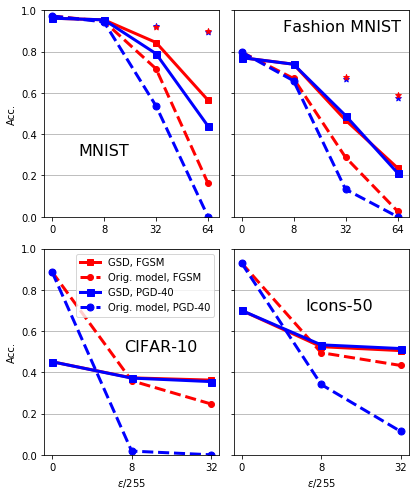

In [9]:


width = 0.3  # the width of the bars

fig, ax = plt.subplots(2, 2, figsize=(6, 7))
# rects1 = ax.bar(x - width/2, fgsm_mnist, width, label='GCD')
# rects2 = ax.bar(x + width/2, fgsm_clean, width, label='Orig. model')

db_name = ['MNIST', 'Fashion MNIST', 'CIFAR-10', 'Icons-50']
attack_name = ['FGSM', 'PGD']

for i in np.arange(4):
    
    gen_fgsm = res_gan[i,0]
    orig_fgsm = res_orig[i,0]
    gen_pgd = res_gan[i,1]
    orig_pgd = res_orig[i,1]   
    
    if i>=2:
        gen_fgsm = gen_fgsm[:-1]
        orig_fgsm = orig_fgsm[:-1]
        gen_pgd = gen_pgd[:-1]
        orig_pgd = orig_pgd[:-1]
        
    
    u, v = i//2, i%2
    ax[u,v].plot(gen_fgsm, '-rs', linewidth=3, markersize=6)
    ax[u,v].plot(orig_fgsm, '--ro',linewidth=3, markersize=6)

    ax[u,v].plot(gen_pgd,'-bs',linewidth=3, markersize=7)
    ax[u,v].plot(orig_pgd,'--bo',linewidth=3, markersize=7)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax[u,v].set_axisbelow(True)
    ax[u,v].grid(axis='y')
    if v==0:
        ax[u,v].set_ylabel('Acc.')
    else:    
        ax[u,v].set_yticklabels([])
#     ax[u,v].set_title(f'{db_name[i]}')
    ax[u,v].set_xticks(np.arange(len(gen_fgsm)))
    ax[u,v].set_xticklabels(['0', '8', '32', '64'])#, rotation='vertical')
    if u>0:
        ax[u,v].set_xticklabels(['0', '8', '32'])#, rotation='vertical')
        ax[u,v].set_xlabel('$\epsilon / 255 $')

    
    ax[u,v].set_ylim([0,1])

    # autolabel(rects1)
    # autolabel(rects2)

    
    
ax[0,0].scatter([2, 3] ,fgsm_mnist, c = 'b', marker='*')
ax[0,0].scatter([2, 3] ,fgsm_pgd, c = 'r', marker='*')

ax[0,1].scatter([2, 3] ,fgsm_fashionmnist, c = 'b', marker='*')
ax[0,1].scatter([2, 3] ,pgd_fashionmnist, c = 'r', marker='*')



ax[1,0].legend(['GSD, FGSM', 'Orig. model, FGSM', 'GSD, PGD-40', 'Orig. model, PGD-40'])


ax[0,0].text(0.5, 0.3, 'MNIST', size = 16) #, horizontalalignment='left', verticalalignment='center')
ax[1,0].text(0.9, 0.5, 'CIFAR-10', size = 16) #, horizontalalignment='left', verticalalignment='bottom')
ax[0,1].text(0.8, 0.9, 'Fashion MNIST', size = 16) #, horizontalalignment='left', verticalalignment='top')
ax[1,1].text(0.8, 0.7, 'Icons-50', size = 16) #, horizontalalignment='left', verticalalignment='center')


fig.tight_layout()

plt.show()






# Robustness

In [61]:
legend = ['gaussian_noise', 'shot_noise', 'impulse_noise', 'glass_blur', 'zoom_blur', 'brightness', 'contrast', 'elastic_transform',
          'motion_blur', 'snow', 'frost', 'pixelate', 'jpeg_compression']

In [218]:
all_res = np.array([
[[0.8674, 0.8827, 0.8933, 0.9060, 0.9168], # EDGE
[0.8724, 0.8755, 0.8818, 0.8978, 0.9117],
[0.8705, 0.8820, 0.9040, 0.9188, 0.9374],
[0.8686, 0.8716, 0.8746, 0.9019, 0.9155],
[0.8772, 0.8762, 0.8892, 0.9110, 0.9429],
[0.8681, 0.8736, 0.8821, 0.8883, 0.8973],
[0.8780, 0.8849, 0.9061, 0.9308, 0.9562],
[0.8624, 0.8698, 0.8724, 0.8807, 0.8860],
[0.8810, 0.8959, 0.9260, 0.9714, 0.9924],
[0.8942, 0.8816, 0.8855, 0.8900, 0.9123],
[0.8691, 0.8698, 0.8804, 0.8894, 0.8926],
[0.8756, 0.8938, 0.9066, 0.9214, 0.9140],
[0.8772, 0.8812, 0.8899, 0.8937, 0.9015],
[0.8654, 0.8631, 0.8680, 0.8727, 0.8709],
[0.8690, 0.8667, 0.8728, 0.8639, 0.8725]],    
    
# RGB    
[[0.4981, 0.6055, 0.7182, 0.7952, 0.8488],
[0.5072, 0.5597, 0.6376, 0.7099, 0.8124],
[0.5509, 0.6131, 0.7551, 0.8355, 0.9243],
[0.5552, 0.6009, 0.6814, 0.7769, 0.8241],
[0.6307, 0.6870, 0.7845, 0.8601, 0.9103],
[0.6031, 0.6870, 0.7447, 0.8010, 0.8423],
[0.5211, 0.5801, 0.6489, 0.7568, 0.8371],
[0.4795, 0.5150, 0.5661, 0.6317, 0.7135],
[0.6243, 0.7051, 0.8204, 0.9331, 0.9769],
[0.5508, 0.5436, 0.5709, 0.6449, 0.7265],
[0.5426, 0.6084, 0.6659, 0.7093, 0.7453],
[0.5385, 0.5861, 0.6375, 0.7015, 0.7083],
[0.5311, 0.5748, 0.6079, 0.6486, 0.6879],
[0.4807, 0.4920, 0.5219, 0.5460, 0.5884],
[0.4896, 0.5217, 0.5367, 0.5141, 0.5421]],
                    
                    
# RGBEdge
[[0.5096, 0.6043, 0.7185, 0.7961, 0.8557],
[0.5116, 0.5625, 0.6388, 0.7067, 0.8208],
[0.5526, 0.6157, 0.7543, 0.8414, 0.9280],
[0.5704, 0.6142, 0.6955, 0.7774, 0.8156],
[0.6190, 0.6768, 0.7688, 0.8364, 0.8860],
[0.6065, 0.6684, 0.7139, 0.7693, 0.8096],
[0.5347, 0.5992, 0.6773, 0.7906, 0.8703],
[0.4907, 0.5241, 0.5763, 0.6391, 0.7193],
[0.6684, 0.7613, 0.8628, 0.9590, 0.9886],
[0.5543, 0.5503, 0.5926, 0.6519, 0.7193],
[0.5513, 0.6139, 0.6639, 0.6995, 0.7298],
[0.5399, 0.5811, 0.6361, 0.6987, 0.7025],
[0.5398, 0.5819, 0.6110, 0.6467, 0.6897],
[0.4877, 0.5017, 0.5273, 0.5509, 0.5816],
[0.5013, 0.5278, 0.5439, 0.5238, 0.5491]],
                    
                    
                    
# tinyImgnet_edge_8_robust_8.pth
[[0.8587, 0.8662, 0.8886, 0.9007, 0.9099],
[0.8578, 0.8643, 0.8751, 0.8861, 0.9012],
[0.8589, 0.8692, 0.8953, 0.9127, 0.9355],
[0.8541, 0.8582, 0.8626, 0.8832, 0.8988],
[0.8640, 0.8618, 0.8726, 0.8932, 0.9303],
[0.8565, 0.8602, 0.8669, 0.8725, 0.8822],
[0.8581, 0.8599, 0.8675, 0.8781, 0.8848],
[0.8671, 0.8885, 0.8990, 0.9212, 0.9070],
[0.8619, 0.8706, 0.8765, 0.8817, 0.8890],
[0.8555, 0.8693, 0.8857, 0.9163, 0.9457],
[0.8525, 0.8589, 0.8638, 0.8721, 0.8773],
[0.8755, 0.8997, 0.9344, 0.9754, 0.9935],
[0.8796, 0.8736, 0.8708, 0.8725, 0.8875],
[0.8541, 0.8544, 0.8566, 0.8577, 0.8579],
[0.8499, 0.8520, 0.8552, 0.8562, 0.8602]],
    
                    
                    
# tinyImgnet_rgb_8_robust_8.pth                    
[[0.4996, 0.5602, 0.6609, 0.7399, 0.8155],
[0.5008, 0.5300, 0.5928, 0.6594, 0.7866],
[0.5329, 0.5832, 0.7127, 0.8080, 0.9083],
[0.5807, 0.6369, 0.7267, 0.8317, 0.8744],
[0.5792, 0.6636, 0.7633, 0.8418, 0.8997],
[0.6079, 0.6775, 0.7234, 0.7782, 0.8123],
[0.5064, 0.5703, 0.6577, 0.7902, 0.8772],
[0.4944, 0.5146, 0.5713, 0.6322, 0.7014],
[0.6315, 0.7240, 0.8295, 0.9352, 0.9714],
[0.5551, 0.5507, 0.5887, 0.6424, 0.7021],
[0.5578, 0.6238, 0.6828, 0.7220, 0.7599],
[0.5328, 0.5669, 0.6360, 0.7084, 0.7006],
[0.5289, 0.5648, 0.5936, 0.6342, 0.6727],
[0.4960, 0.5057, 0.5290, 0.5551, 0.6142],
[0.4967, 0.5230, 0.5236, 0.5286, 0.5331]],
    
    
# tinyImgnet_rgbedge_8_robust_8.pth
[[0.5001, 0.5507, 0.6488, 0.7235, 0.7961],
[0.5009, 0.5310, 0.5894, 0.6444, 0.7609],
[0.5192, 0.5629, 0.6926, 0.7894, 0.9009],
[0.5859, 0.6297, 0.7056, 0.8031, 0.8377],
[0.5693, 0.6419, 0.7346, 0.8024, 0.8720],
[0.5999, 0.6577, 0.6980, 0.7480, 0.7891],
[0.5253, 0.5948, 0.6912, 0.8183, 0.9030],
[0.4933, 0.5217, 0.5711, 0.6361, 0.7120],
[0.6543, 0.7454, 0.8474, 0.9500, 0.9813],
[0.5592, 0.5563, 0.5907, 0.6314, 0.6860],
[0.5577, 0.6167, 0.6605, 0.7042, 0.7401],
[0.5356, 0.5674, 0.6315, 0.7110, 0.7127],
[0.5311, 0.5754, 0.6050, 0.6439, 0.6858],
[0.5025, 0.5143, 0.5369, 0.5550, 0.5983],
[0.4943, 0.5117, 0.5210, 0.5225, 0.5224]],
                   

# tinyImgnet_edge_32_robust_32.pth    
[[0.9093, 0.9213, 0.9366, 0.9428, 0.9526], 
[0.9091, 0.9187, 0.9301, 0.9399, 0.9492], 
[0.9130, 0.9261, 0.9466, 0.9566, 0.9679], 
[0.9052, 0.9054, 0.9089, 0.9154, 0.9223], 
[0.9127, 0.9111, 0.9178, 0.9244, 0.9420], 
[0.9041, 0.9067, 0.9090, 0.9147, 0.9218], 
[0.9037, 0.9099, 0.9089, 0.9116, 0.9165], 
[0.9207, 0.9319, 0.9372, 0.9506, 0.9387], 
[0.9132, 0.9166, 0.9252, 0.9302, 0.9344], 
[0.9084, 0.9175, 0.9268, 0.9408, 0.9598], 
[0.9049, 0.9073, 0.9083, 0.9126, 0.9153], 
[0.9049, 0.9165, 0.9410, 0.9752, 0.9933], 
[0.9197, 0.9134, 0.9152, 0.9172, 0.9299], 
[0.9053, 0.9075, 0.9061, 0.9082, 0.9070], 
[0.9056, 0.9063, 0.9076, 0.9069, 0.9082]], 

# tinyImgnet_rgb_32_robust_32.pth    
[[0.5312, 0.5920, 0.6782, 0.7470, 0.8185], 
[0.5337, 0.5636, 0.6187, 0.6708, 0.7854], 
[0.5572, 0.6019, 0.7169, 0.8093, 0.9128], 
[0.6071, 0.6522, 0.7325, 0.8365, 0.8743], 
[0.5866, 0.6658, 0.7604, 0.8327, 0.8887], 
[0.5762, 0.6307, 0.6790, 0.7245, 0.7592], 
[0.6230, 0.6791, 0.7206, 0.7682, 0.8015], 
[0.5616, 0.5918, 0.6569, 0.7335, 0.7287], 
[0.5717, 0.6160, 0.6547, 0.6949, 0.7395], 
[0.5479, 0.6218, 0.7161, 0.8362, 0.9173], 
[0.5165, 0.5462, 0.5995, 0.6704, 0.7406], 
[0.6923, 0.7801, 0.8692, 0.9556, 0.9793], 
[0.5856, 0.5792, 0.6116, 0.6459, 0.6915], 
[0.5224, 0.5346, 0.5543, 0.5782, 0.6250], 
[0.5202, 0.5432, 0.5446, 0.5445, 0.5450]], 
    
    
# tinyImgnet_rgbedge_32_robust_32.pth 
[[0.5556, 0.6169, 0.7005, 0.7601, 0.8210], 
[0.5588, 0.5926, 0.6418, 0.6929, 0.7956], 
[0.5801, 0.6216, 0.7370, 0.8113, 0.9090], 
[0.6089, 0.6384, 0.7001, 0.7958, 0.8370], 
[0.5911, 0.6451, 0.7207, 0.7900, 0.8619], 
[0.5857, 0.6243, 0.6650, 0.7018, 0.7332], 
[0.6144, 0.6603, 0.6958, 0.7373, 0.7687], 
[0.5805, 0.6131, 0.6785, 0.7507, 0.7562], 
[0.5935, 0.6351, 0.6698, 0.7076, 0.7487], 
[0.5629, 0.6336, 0.7236, 0.8470, 0.9192], 
[0.5353, 0.5713, 0.6371, 0.7067, 0.7740], 
[0.6972, 0.7750, 0.8653, 0.9543, 0.9793], 
[0.5935, 0.5877, 0.6132, 0.6371, 0.6740], 
[0.5386, 0.5514, 0.5657, 0.5799, 0.6124], 
[0.5358, 0.5493, 0.5567, 0.5606, 0.5640]],     
    ])






In [190]:
all_res.shape

(6, 15, 5)

In [107]:
1-np.mean(all_res, axis=1)#.mean(axis=1)

array([[0.44791, 0.3903 , 0.30722, 0.22549, 0.15838],
       [0.43822, 0.38232, 0.30012, 0.22321, 0.15868],
       [0.45115, 0.3989 , 0.3173 , 0.2341 , 0.16511],
       [0.44926, 0.40079, 0.32306, 0.24534, 0.1761 ]])

In [179]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [310]:
def gplot(all_res):
    symbs = ['r-','g-', 'b-', 'k-', 'c-', 'r--','g--', 'b--', 'k--', 'c--', 'r-.','g-.', 'b-.', 'k-.', 'c.', 'g-']

    models = ['Edge', 'RGB', 'RGBEdge', 'Edge-Robust-8', 'RGB-Robust-8', 'RGBEdge-Robust-8',  'Edge-Robust-32', 'RGB-Robust-32', 'RGBEdge-Robust-32']

    legend = ['gaussian_noise', 'shot_noise', 'impulse_noise',
        'defocus_blur', 'glass_blur', 
        'motion_blur', 
        'zoom_blur',
        'snow', 
        'frost', 
        'fog', 
        'brightness',
        'contrast', 
        'elastic_transform', 
        'pixelate', 
        'jpeg_compression', 'Avg.']

    fig, ax = plt.subplots(3, 3, figsize=(15,15))

    for mIdx,res in enumerate(all_res):
    #     ax[i].figure(figsize=(8, 8))
        u, v = mIdx//3, mIdx%3
        for idx,i in enumerate(res):
            ax[u,v].plot(1-i, symbs[idx])

        ax[u,v].set_xticks(np.arange(5), )
        ax[u,v].set_xticklabels(['1', '2', '3', '4', '5'])#, rotation='vertical')    
        if u==2:
            ax[u,v].set_xlabel('Severity')
        if v==0:        
            ax[u,v].set_ylabel('Top-1 Acc.')
    #     ax[u,v].set_xticklabels(np.arange(5),['1', '2', '3', '4', '5'])#, rotation='vertical')

        ax[u,v].plot(1 - np.mean(res,axis=0), symbs[-1], linewidth=7)
        ax[u,v].set_title(models[mIdx])
    #     ax[u,v].set_ylim([0,.6])

        if mIdx == 0:
            ax[u,v].legend(legend)    


    # plt.show()
    plt.tight_layout()


        

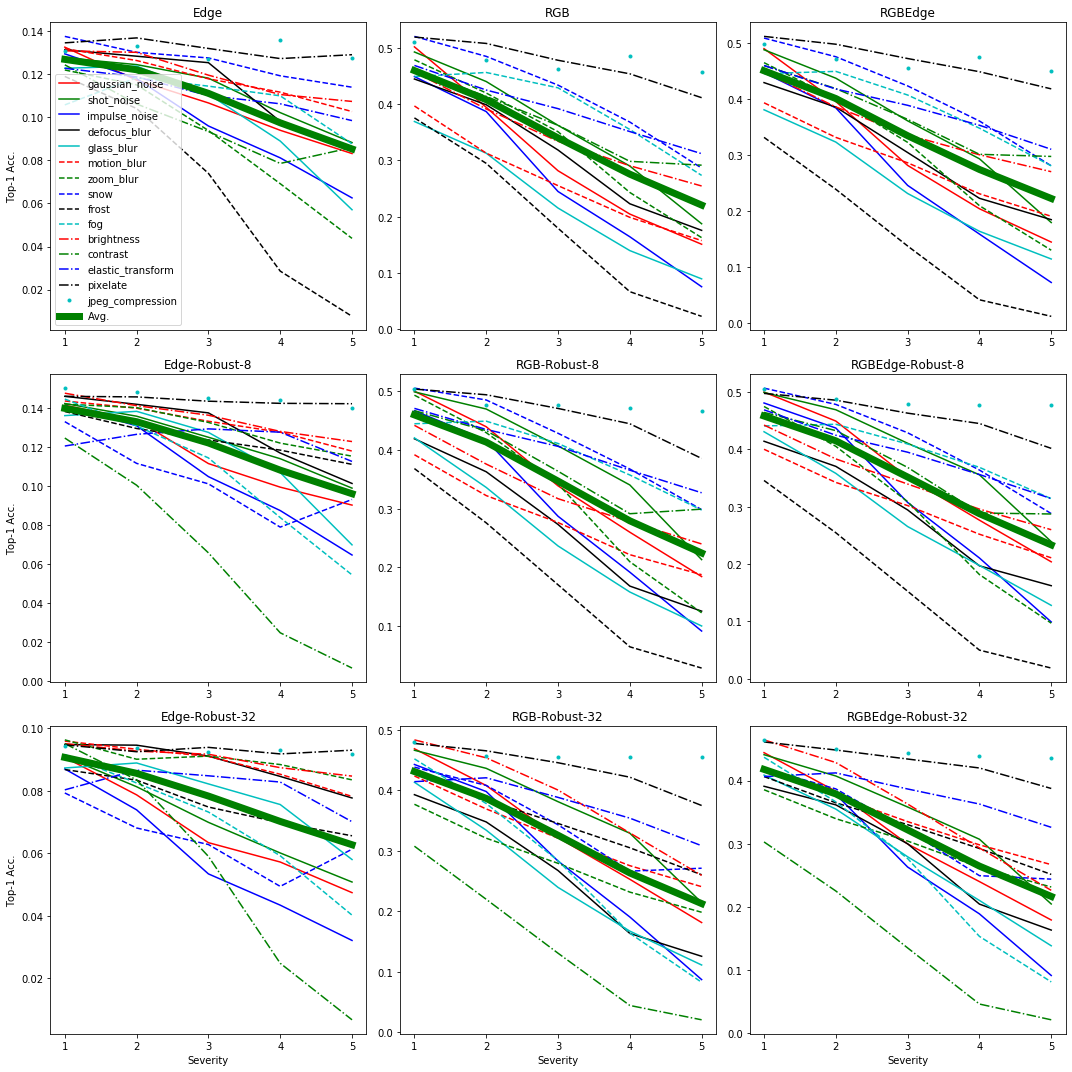

In [311]:
gplot(all_res)

In [331]:
# GTSRB
all_res_gtsrb = np.array([ # gtsrb_edge.pth
[[ 0.8404, 0.8697, 0.8893, 0.9007, 0.9107], 
[ 0.8222, 0.8572, 0.8795, 0.8915, 0.9158], 
[ 0.8130, 0.8537, 0.9011, 0.9188, 0.9370], 
[ 0.7766, 0.7781, 0.7732, 0.7894, 0.8074], 
[ 0.8067, 0.7980, 0.7930, 0.8497, 0.9128], 
[ 0.7938, 0.7940, 0.7883, 0.7927, 0.8043], 
[ 0.7768, 0.7713, 0.7518, 0.7485, 0.7434], 
[ 0.8152, 0.8626, 0.8682, 0.8874, 0.8717], 
[ 0.8209, 0.8423, 0.8501, 0.8639, 0.8738], 
[ 0.7789, 0.7888, 0.7971, 0.8154, 0.8646], 
[ 0.7779, 0.7784, 0.7835, 0.7899, 0.7967], 
[ 0.7800, 0.7895, 0.8050, 0.8371, 0.9055], 
[ 0.7964, 0.7921, 0.7854, 0.7993, 0.8422], 
[ 0.7804, 0.7813, 0.7804, 0.7767, 0.7747], 
[ 0.7985, 0.8009, 0.8049, 0.8156, 0.8301]], 
# gtsrb_rgb.pth
[[0.5606, 0.6599, 0.7363, 0.7776, 0.8063], 
[ 0.5565, 0.6278, 0.6973, 0.7529, 0.8329], 
[ 0.6427, 0.7026, 0.7869, 0.8294, 0.8808], 
[ 0.4812, 0.4829, 0.4960, 0.5193, 0.5485], 
[ 0.6369, 0.5519, 0.5884, 0.7035, 0.7803], 
[ 0.4897, 0.4952, 0.5033, 0.5171, 0.5306], 
[ 0.4625, 0.4597, 0.4534, 0.4466, 0.4419], 
[ 0.5442, 0.6036, 0.6378, 0.6797, 0.6519], 
[ 0.5378, 0.5848, 0.6203, 0.6516, 0.6828], 
[ 0.5109, 0.5519, 0.5962, 0.6559, 0.7185], 
[ 0.4763, 0.4886, 0.5126, 0.5364, 0.5587], 
[ 0.5185, 0.5435, 0.5880, 0.6817, 0.8011], 
[ 0.5199, 0.5011, 0.4972, 0.5041, 0.5983], 
[ 0.4970, 0.5082, 0.5306, 0.5533, 0.5588], 
[ 0.5165, 0.5202, 0.5276, 0.5359, 0.5647]],     
# gtsrb_rgbedge.pth    
[[ 0.5083, 0.6188, 0.7061, 0.7500, 0.7890], 
[ 0.4920, 0.5468, 0.6143, 0.6804, 0.7677], 
[ 0.5551, 0.6411, 0.7486, 0.8078, 0.8559], 
[ 0.4509, 0.4521, 0.4567, 0.4855, 0.5112], 
[ 0.5422, 0.4892, 0.5165, 0.6406, 0.7424], 
[ 0.4601, 0.4656, 0.4710, 0.4825, 0.4971], 
[ 0.4289, 0.4186, 0.4070, 0.3956, 0.3816], 
[ 0.5135, 0.5969, 0.6454, 0.6990, 0.6636], 
[ 0.5063, 0.5680, 0.6040, 0.6388, 0.6703], 
[ 0.4691, 0.5195, 0.5747, 0.6476, 0.7203], 
[ 0.4320, 0.4463, 0.4714, 0.4976, 0.5243], 
[ 0.4747, 0.5072, 0.5762, 0.7044, 0.8338], 
[ 0.4996, 0.4758, 0.4850, 0.4975, 0.5740], 
[ 0.4568, 0.4662, 0.4739, 0.4800, 0.4747], 
[ 0.4746, 0.4798, 0.4857, 0.4998, 0.5363]], 

    
    
# gtsrb_edge_8_robust_8.pth    
[[ 0.5751, 0.6565, 0.7088, 0.7399, 0.7693], 
[ 0.5431, 0.6049, 0.6619, 0.6975, 0.7517], 
[ 0.5512, 0.6181, 0.7197, 0.7623, 0.8173], 
[ 0.4990, 0.4987, 0.4968, 0.5222, 0.5565], 
[ 0.5182, 0.5124, 0.5186, 0.6004, 0.7354], 
[ 0.5127, 0.5162, 0.5191, 0.5327, 0.5463], 
[ 0.4816, 0.4671, 0.4530, 0.4396, 0.4285], 
[ 0.5542, 0.6413, 0.6614, 0.7078, 0.6729], 
[ 0.5652, 0.6050, 0.6326, 0.6541, 0.6763], 
[ 0.5100, 0.5310, 0.5464, 0.5851, 0.6572], 
[ 0.5059, 0.5090, 0.5181, 0.5268, 0.5429], 
[ 0.5036, 0.5289, 0.5763, 0.6800, 0.8302], 
[ 0.5492, 0.5298, 0.5246, 0.5291, 0.5725], 
[ 0.5060, 0.5076, 0.5087, 0.5036, 0.5054], 
[ 0.5220, 0.5288, 0.5376, 0.5460, 0.5776]],    
# gtsrb_rgb_8_robust_8.pth
[[ 0.7594, 0.7778, 0.8023, 0.8207, 0.8340], 
[ 0.7675, 0.7840, 0.8059, 0.8264, 0.8599], 
[ 0.7960, 0.8177, 0.8489, 0.8658, 0.8953], 
[ 0.7366, 0.7335, 0.7269, 0.7173, 0.7218], 
[ 0.7752, 0.7480, 0.7510, 0.7805, 0.8094], 
[ 0.7439, 0.7404, 0.7391, 0.7423, 0.7454], 
[ 0.7213, 0.6960, 0.6821, 0.6618, 0.6443], 
[ 0.5677, 0.5952, 0.6181, 0.6713, 0.6238], 
[ 0.5177, 0.5454, 0.5704, 0.5928, 0.6189], 
[ 0.5640, 0.5769, 0.6059, 0.6591, 0.7183], 
[ 0.5028, 0.4897, 0.5061, 0.5216, 0.5399], 
[ 0.5995, 0.5947, 0.6055, 0.6619, 0.7409], 
[ 0.7555, 0.7493, 0.7439, 0.7557, 0.7855], 
[ 0.7535, 0.7551, 0.7587, 0.7568, 0.7544], 
[ 0.7546, 0.7546, 0.7580, 0.7599, 0.7691]], 
# gtsrb_rgbedge_8_robust_8.pth    
[[0.5864, 0.6755, 0.7272, 0.7540, 0.7745], 
[ 0.5866, 0.6275, 0.6812, 0.7295, 0.7941], 
[ 0.6397, 0.6945, 0.7664, 0.8026, 0.8483], 
[ 0.5509, 0.5515, 0.5526, 0.5676, 0.5892], 
[ 0.5903, 0.5571, 0.5819, 0.6694, 0.7488], 
[ 0.5643, 0.5700, 0.5738, 0.5842, 0.5957], 
[ 0.5181, 0.5033, 0.4879, 0.4732, 0.4615], 
[ 0.5191, 0.5931, 0.6177, 0.6721, 0.6359], 
[ 0.5042, 0.5443, 0.5780, 0.6007, 0.6375], 
[ 0.4864, 0.5130, 0.5550, 0.6152, 0.6854], 
[ 0.4498, 0.4323, 0.4404, 0.4669, 0.4885], 
[ 0.5127, 0.5265, 0.5711, 0.6862, 0.8238], 
[ 0.5883, 0.5737, 0.5747, 0.5854, 0.6461], 
[ 0.5633, 0.5644, 0.5778, 0.5799, 0.5686], 
[ 0.5699, 0.5734, 0.5795, 0.5837, 0.6084]],     
    
# gtsrb_edge_32_robust_32.pth    
[[ 0.5462, 0.6551, 0.7221, 0.7609, 0.7899], 
[ 0.5143, 0.5698, 0.6329, 0.6790, 0.7357], 
[ 0.4983, 0.5950, 0.7311, 0.7805, 0.8422], 
[ 0.4770, 0.4789, 0.4818, 0.5082, 0.5348], 
[ 0.5052, 0.4954, 0.5055, 0.5925, 0.7151], 
[ 0.4854, 0.4920, 0.4984, 0.5085, 0.5238], 
[ 0.4617, 0.4504, 0.4394, 0.4249, 0.4171], 
[ 0.5115, 0.6443, 0.6624, 0.7272, 0.6856], 
[ 0.5416, 0.5911, 0.6307, 0.6576, 0.6864], 
[ 0.4850, 0.4937, 0.5087, 0.5492, 0.6294], 
[ 0.4827, 0.4857, 0.4965, 0.5051, 0.5211], 
[ 0.4880, 0.5116, 0.5651, 0.6770, 0.8321], 
[ 0.5290, 0.5109, 0.5091, 0.5177, 0.5519], 
[ 0.4850, 0.4854, 0.4880, 0.4838, 0.4851], 
[ 0.4963, 0.4989, 0.5038, 0.5161, 0.5416]],     
# gtsrb_rgb_32_robust_32.pth    
[[ 0.6620, 0.6918, 0.7249, 0.7417, 0.7591], 
[ 0.6858, 0.7075, 0.7370, 0.7632, 0.7979], 
[ 0.7127, 0.7384, 0.7788, 0.7993, 0.8324], 
[ 0.6484, 0.6474, 0.6459, 0.6444, 0.6538], 
[ 0.6977, 0.6605, 0.6679, 0.6948, 0.7257], 
[ 0.6554, 0.6551, 0.6542, 0.6565, 0.6663], 
[ 0.6257, 0.5960, 0.5782, 0.5549, 0.5396], 
[ 0.5527, 0.5872, 0.6194, 0.6721, 0.6272], 
[ 0.5337, 0.5698, 0.5928, 0.6123, 0.6340], 
[ 0.5376, 0.5698, 0.6095, 0.6752, 0.7399], 
[ 0.5002, 0.4929, 0.5090, 0.5312, 0.5568], 
[ 0.5530, 0.5558, 0.5728, 0.6304, 0.7188], 
[ 0.6679, 0.6631, 0.6578, 0.6604, 0.6850], 
[ 0.6633, 0.6605, 0.6708, 0.6708, 0.6672], 
[ 0.6630, 0.6659, 0.6660, 0.6681, 0.6830]],     
# gtsrb_rgbedge_32_robust_32.pth    
[[ 0.5337, 0.6225, 0.6708, 0.6964, 0.7143], 
[ 0.5065, 0.5439, 0.5884, 0.6283, 0.6879], 
[ 0.5618, 0.6245, 0.6940, 0.7260, 0.7729], 
[ 0.4832, 0.4846, 0.4848, 0.5015, 0.5213], 
[ 0.5041, 0.4936, 0.5048, 0.5725, 0.6580], 
[ 0.4942, 0.4999, 0.5019, 0.5172, 0.5296], 
[ 0.4606, 0.4504, 0.4310, 0.4135, 0.3974], 
[ 0.4895, 0.5549, 0.5822, 0.6363, 0.6036], 
[ 0.5016, 0.5359, 0.5666, 0.5853, 0.6111], 
[ 0.4930, 0.5274, 0.5589, 0.6279, 0.6908], 
[ 0.4600, 0.4665, 0.4835, 0.5000, 0.5219], 
[ 0.5122, 0.5364, 0.5959, 0.7127, 0.8450], 
[ 0.5188, 0.5037, 0.5038, 0.5020, 0.5370], 
[ 0.4880, 0.4932, 0.4966, 0.4974, 0.4958], 
[ 0.5029, 0.5074, 0.5108, 0.5175, 0.5367]]])     

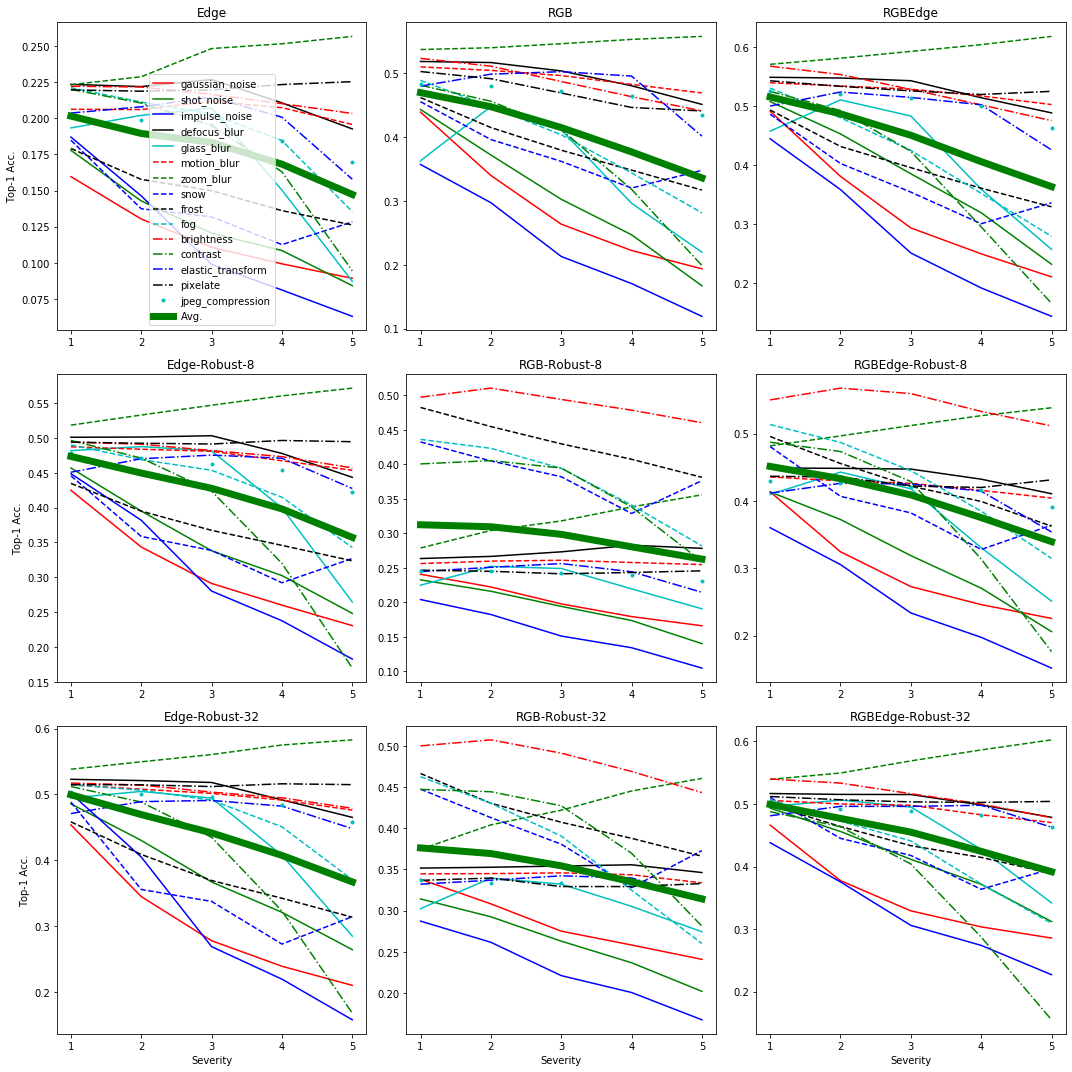

In [332]:
gplot(all_res_gtsrb)

In [487]:

# Icons
all_res_icons= np.array([[[ 0.7721, 0.8793, 0.8994, 0.9044, 0.9170], # Namespace(classes=50, data_dir='Icons-50', inp_size=64, model_name='icons_edge.pth', net_type='edge')
[ 0.8647, 0.8736, 0.8925, 0.8958, 0.9120], 
[ 0.8472, 0.8826, 0.9110, 0.9160, 0.9219], 
[ 0.7069, 0.7046, 0.7115, 0.7215, 0.7281], 
[ 0.7188, 0.7139, 0.7397, 0.7959, 0.8756], 
[ 0.7016, 0.7036, 0.7172, 0.7155, 0.7096], 
[ 0.7063, 0.7168, 0.7278, 0.7390, 0.7526], 
[ 0.7542, 0.7665, 0.7949, 0.8068, 0.8048], 
[ 0.7466, 0.7595, 0.7896, 0.8042, 0.8200], 
[ 0.7357, 0.7691, 0.7976, 0.8425, 0.8898], 
[ 0.7066, 0.7076, 0.7115, 0.7248, 0.7231], 
[ 0.7076, 0.7115, 0.7135, 0.7390, 0.8273], 
[ 0.7493, 0.7337, 0.7360, 0.7489, 0.8078], 
[ 0.7135, 0.7155, 0.7132, 0.7139, 0.7046], 
[ 0.7430, 0.7565, 0.7651, 0.7635, 0.7827]], 
# Namespace(classes=50, data_dir='Icons-50', inp_size=64, model_name='icons_rgb.pth', net_type='rgb')
[[ 0.6001, 0.6570, 0.7192, 0.7671, 0.8055], 
[ 0.6193, 0.6599, 0.7158, 0.7615, 0.8260], 
[ 0.6378, 0.6831, 0.7668, 0.8346, 0.8710], 
[ 0.5607, 0.5660, 0.5958, 0.6857, 0.7357], 
[ 0.7072, 0.6761, 0.7317, 0.8065, 0.8548], 
[ 0.5614, 0.5710, 0.5901, 0.6126, 0.6341], 
[ 0.5832, 0.6212, 0.6421, 0.6781, 0.7096], 
[ 0.6262, 0.6599, 0.7086, 0.7717, 0.7800], 
[ 0.6292, 0.6437, 0.6639, 0.6871, 0.7198], 
[ 0.6067, 0.6656, 0.7271, 0.8108, 0.8624], 
[ 0.5700, 0.5835, 0.6004, 0.6219, 0.6480], 
[ 0.6768, 0.7545, 0.8406, 0.9315, 0.9514], 
[ 0.6067, 0.5997, 0.5951, 0.6236, 0.7112], 
[ 0.5630, 0.5772, 0.6060, 0.6305, 0.6457], 
[ 0.5683, 0.5680, 0.5696, 0.5805, 0.5895]], 
# Namespace(classes=50, data_dir='Icons-50', inp_size=64, model_name='icons_rgbedge.pth', net_type='rgbedge')
[[ 0.6130, 0.6874, 0.7297, 0.7605, 0.7979], 
[ 0.6484, 0.6844, 0.7274, 0.7641, 0.8138], 
[ 0.6444, 0.6824, 0.7767, 0.8177, 0.8769], 
[ 0.5809, 0.5825, 0.5938, 0.6259, 0.6553], 
[ 0.7006, 0.6685, 0.7006, 0.7717, 0.8247], 
[ 0.5805, 0.5888, 0.5987, 0.6123, 0.6216], 
[ 0.5971, 0.6156, 0.6345, 0.6563, 0.6848], 
[ 0.6146, 0.6583, 0.7122, 0.7674, 0.7721], 
[ 0.6302, 0.6517, 0.6656, 0.6960, 0.7235], 
[ 0.6408, 0.6957, 0.7526, 0.8326, 0.8776], 
[ 0.5782, 0.5971, 0.6146, 0.6328, 0.6497], 
[ 0.6851, 0.7483, 0.8286, 0.8968, 0.9302], 
[ 0.6298, 0.6067, 0.6044, 0.6384, 0.7307], 
[ 0.5815, 0.5961, 0.6173, 0.6325, 0.6315], 
[ 0.5815, 0.5829, 0.5888, 0.5921, 0.6077]], 
# Namespace(classes=50, data_dir='Icons-50', inp_size=64, model_name='FGSM-Icons/icons_edge_8_robust_8.pth', net_type='edge')
[[ 0.7545, 0.8793, 0.9008, 0.9047, 0.9163], 
[ 0.8637, 0.8842, 0.8938, 0.9004, 0.9166], 
[ 0.8356, 0.8756, 0.9094, 0.9166, 0.9315], 
[ 0.6791, 0.6791, 0.6834, 0.6957, 0.6953], 
[ 0.6904, 0.6841, 0.7039, 0.7761, 0.8630], 
[ 0.6831, 0.6785, 0.6838, 0.6891, 0.6894], 
[ 0.6877, 0.7003, 0.7112, 0.7185, 0.7330], 
[ 0.7307, 0.7459, 0.7625, 0.7929, 0.7906], 
[ 0.7235, 0.7377, 0.7747, 0.7966, 0.8108], 
[ 0.7158, 0.7496, 0.7847, 0.8382, 0.8746], 
[ 0.6821, 0.6801, 0.6804, 0.6953, 0.7033], 
[ 0.6795, 0.6788, 0.6867, 0.7188, 0.8075], 
[ 0.7287, 0.7175, 0.7175, 0.7198, 0.7770], 
[ 0.6884, 0.6904, 0.6831, 0.6907, 0.6831], 
[ 0.7195, 0.7317, 0.7307, 0.7436, 0.7681]], 
# Namespace(classes=50, data_dir='Icons-50', inp_size=64, model_name='FGSM-Icons/icons_rgb_8_robust_8.pth', net_type='rgb')
[[ 0.6262, 0.6682, 0.7142, 0.7506, 0.7827], 
[ 0.6308, 0.6583, 0.6950, 0.7373, 0.7873], 
[ 0.7221, 0.7721, 0.8544, 0.8855, 0.9156], 
[ 0.6021, 0.6050, 0.6087, 0.6520, 0.6781], 
[ 0.7519, 0.7016, 0.7311, 0.7873, 0.8300], 
[ 0.6107, 0.6113, 0.6103, 0.6236, 0.6282], 
[ 0.6292, 0.6474, 0.6546, 0.6659, 0.6857], 
[ 0.6947, 0.7072, 0.7383, 0.7774, 0.7989], 
[ 0.7013, 0.6993, 0.7006, 0.6996, 0.7185], 
[ 0.5501, 0.6044, 0.6494, 0.7430, 0.8230], 
[ 0.6457, 0.6649, 0.6857, 0.7003, 0.7145], 
[ 0.5938, 0.6437, 0.7228, 0.8478, 0.9173], 
[ 0.6537, 0.6331, 0.6388, 0.6679, 0.7393], 
[ 0.6245, 0.6308, 0.6593, 0.6828, 0.6841], 
[ 0.6011, 0.6004, 0.6027, 0.6050, 0.6040]], 
# Namespace(classes=50, data_dir='Icons-50', inp_size=64, model_name='FGSM-Icons/icons_rgbedge_8_robust_8.pth', net_type='rgbedge')
[[ 0.6275, 0.7172, 0.7456, 0.7612, 0.7982], 
[ 0.6821, 0.7099, 0.7327, 0.7572, 0.8005], 
[ 0.7215, 0.7956, 0.8591, 0.8925, 0.9206], 
[ 0.6140, 0.6176, 0.6189, 0.6242, 0.6404], 
[ 0.7291, 0.6808, 0.7072, 0.7704, 0.8389], 
[ 0.6133, 0.6166, 0.6199, 0.6242, 0.6328], 
[ 0.6232, 0.6381, 0.6500, 0.6662, 0.6804], 
[ 0.6887, 0.7215, 0.7668, 0.8114, 0.8194], 
[ 0.6977, 0.7000, 0.7049, 0.7152, 0.7377], 
[ 0.5981, 0.6530, 0.7023, 0.7810, 0.8475], 
[ 0.6341, 0.6527, 0.6738, 0.6986, 0.7185], 
[ 0.6209, 0.6642, 0.7426, 0.8422, 0.8994], 
[ 0.6636, 0.6378, 0.6355, 0.6573, 0.7459], 
[ 0.6216, 0.6272, 0.6437, 0.6457, 0.6540], 
[ 0.6037, 0.6050, 0.6093, 0.6126, 0.6206]], 
# Namespace(classes=50, data_dir='Icons-50', inp_size=64, model_name='FGSM-Icons/icons_edge_32_robust_32.pth', net_type='edge')
[[ 0.7496, 0.8822, 0.8965, 0.8978, 0.9087], 
[ 0.8475, 0.8766, 0.8905, 0.8975, 0.9067], 
[ 0.8025, 0.8597, 0.9024, 0.9100, 0.9233], 
[ 0.6778, 0.6738, 0.6818, 0.6871, 0.6990], 
[ 0.6874, 0.6801, 0.6980, 0.7426, 0.8277], 
[ 0.6781, 0.6801, 0.6775, 0.6732, 0.6894], 
[ 0.6897, 0.7086, 0.7129, 0.7284, 0.7453], 
[ 0.7205, 0.7284, 0.7512, 0.7754, 0.7770], 
[ 0.7086, 0.7235, 0.7522, 0.7810, 0.8035], 
[ 0.7006, 0.7314, 0.7549, 0.8128, 0.8584], 
[ 0.6788, 0.6758, 0.6738, 0.6884, 0.7003], 
[ 0.6785, 0.6808, 0.6864, 0.7364, 0.8101], 
[ 0.7188, 0.7132, 0.7000, 0.7059, 0.7364], 
[ 0.6821, 0.6861, 0.6831, 0.6791, 0.6804], 
[ 0.6914, 0.7006, 0.6980, 0.7069, 0.7228]], 
# Namespace(classes=50, data_dir='Icons-50', inp_size=64, model_name='FGSM-Icons/icons_rgb_32_robust_32.pth', net_type='rgb')
[[ 0.5772, 0.6130, 0.6616, 0.6874, 0.7287], 
[ 0.5839, 0.6183, 0.6477, 0.6861, 0.7469], 
[ 0.6441, 0.7089, 0.7942, 0.8399, 0.8855], 
[ 0.5647, 0.5647, 0.5753, 0.6186, 0.6517], 
[ 0.6533, 0.6229, 0.6517, 0.7145, 0.7784], 
[ 0.5733, 0.5776, 0.5822, 0.5974, 0.6103], 
[ 0.5799, 0.6070, 0.6341, 0.6566, 0.6804], 
[ 0.6315, 0.6484, 0.7000, 0.7529, 0.7625], 
[ 0.6374, 0.6451, 0.6484, 0.6632, 0.6851], 
[ 0.5739, 0.6179, 0.6589, 0.7387, 0.8022], 
[ 0.5958, 0.6116, 0.6378, 0.6586, 0.6765], 
[ 0.5842, 0.6341, 0.7304, 0.8601, 0.9097], 
[ 0.6282, 0.6057, 0.6040, 0.6202, 0.6834], 
[ 0.5716, 0.5723, 0.5997, 0.6077, 0.6196], 
[ 0.5514, 0.5521, 0.5587, 0.5624, 0.5630]], 
# Namespace(classes=50, data_dir='Icons-50', inp_size=64, model_name='FGSM-Icons/icons_rgbedge_32_robust_32.pth', net_type='rgbedge')
[[ 0.5706, 0.6391, 0.6761, 0.7072, 0.7360], 
[ 0.6037, 0.6417, 0.6662, 0.6960, 0.7479], 
[ 0.6464, 0.7079, 0.8019, 0.8415, 0.8875], 
[ 0.5776, 0.5809, 0.5779, 0.6001, 0.6219], 
[ 0.6603, 0.6245, 0.6487, 0.7066, 0.7638], 
[ 0.5769, 0.5802, 0.5812, 0.5905, 0.5997], 
[ 0.5935, 0.6034, 0.6226, 0.6480, 0.6616], 
[ 0.6232, 0.6494, 0.7000, 0.7516, 0.7737], 
[ 0.6328, 0.6322, 0.6312, 0.6566, 0.6712], 
[ 0.5660, 0.6014, 0.6543, 0.7373, 0.8157], 
[ 0.5978, 0.6236, 0.6470, 0.6619, 0.6804], 
[ 0.6097, 0.6613, 0.7400, 0.8419, 0.9034], 
[ 0.6269, 0.6073, 0.6057, 0.5978, 0.6639], 
[ 0.5829, 0.5872, 0.6047, 0.6064, 0.6146], 
[ 0.5607, 0.5633, 0.5604, 0.5706, 0.5710]]])


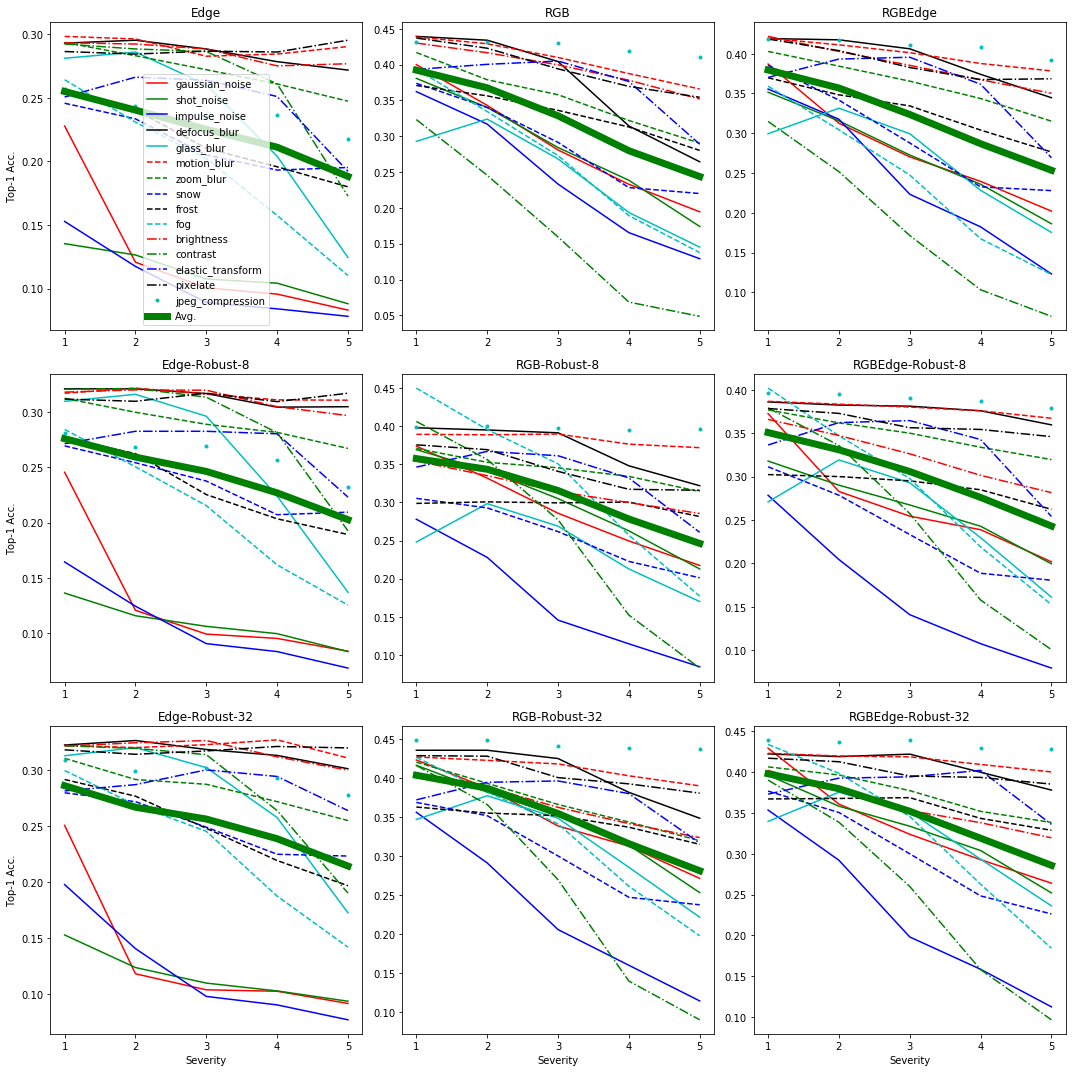

In [488]:
gplot(all_res_icons)

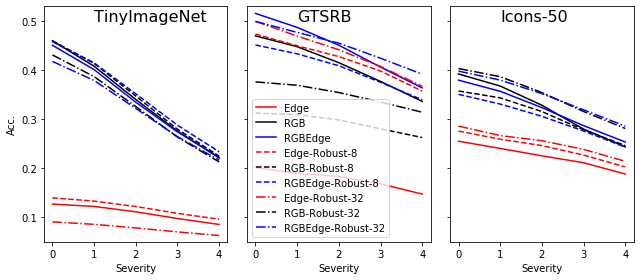

In [491]:
meanRes = np.mean(all_res, axis=1)#.mean(axis=1)
meanRes_gtsrb = np.mean(all_res_gtsrb, axis=1)#.mean(axis=1)
meanRes_icons = np.mean(all_res_icons, axis=1)#.mean(axis=1)

data = [meanRes, meanRes_gtsrb, meanRes_icons]
labels = ['TinyImageNet', 'GTSRB', 'Icons-50']

symbs = ['r-','k-', 'b-', 'r--','k--', 'b--', 'r-.','k-.', 'b-.']

# plt.figure(figsize=(4, 6))
fig, ax = plt.subplots(1, 3, figsize=(9,4))


for k in [0,1,2]:
    for idx,i in enumerate(data[k]):
        ax[k].plot(1-i, symbs[idx])

    ax[k].set_xlabel('Severity')
    # plt.set_xticklabels(['1', '2', '3', '4', '5'])#, rotation='vertical')
    ax[k].set_ylim([0.05,.53])
    # plt.plot(1 - np.mean(rgb,axis=0), 'k', linewidth=5)

#     ax[k].set_title(labels[k])
    
    ax[k].text(1, 0.5, labels[k], size = 16) #, horizontalalignment='left', verticalalignment='center')    
    
    
    # plt.show()
ax[1].legend(models,loc='lower left')    
ax[0].set_xticks(np.arange(rgb.shape[1]), ['1', '2', '3', '4', '5'])
ax[0].set_ylabel('Acc.')
ax[1].set_yticklabels([])
ax[2].set_yticklabels([])



fig.tight_layout()